### SENTIMENT ANALYSIS PROJECT

In [1]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.ensemble import RandomForestClassifier
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to C:\Users\Luxmi
[nltk_data]     Acharya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Luxmi
[nltk_data]     Acharya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#pip install nltk

In [3]:
# df = pd.read_csv('H:\\DataScience Rec.csv', encoding = 'latin1')
# df = df.sample(frac = 1)
# df

In [22]:
df = pd.read_csv('H:\\DataScience Rec\\Corona_NLP_test.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
708,709,45661,USA,12-03-2020,https://t.co/eJwDzqWoq8 3M N95 masks for sale....,Extremely Positive
2046,2047,46999,Malaysia,13-03-2020,PSA: Despite the pandemic declaration &amp; in...,Negative
933,934,45886,"Ohio, USA",12-03-2020,I just returned from the grocery store. Shelv...,Extremely Negative
3295,3296,48248,NaN,15-03-2020,COVID-19 is just feeding my online shopping ad...,Neutral
1688,1689,46641,Lancashire,13-03-2020,@BBCNWT went shopping this am. Took a trolley ...,Positive
...,...,...,...,...,...,...
3679,3680,48632,"Washington, DC",16-03-2020,Yesterday I spoke with the great American Groc...,Extremely Positive
1575,1576,46528,"Orange, CA",13-03-2020,@ABC7 #abc7eyewitness #Coronavirus \r\r\nWalma...,Extremely Negative
2688,2689,47641,Los Angeles,14-03-2020,Imagine if we had a president who had a plan f...,Extremely Negative
3269,3270,48222,"Philadelphia, PA",15-03-2020,Liquor store done ? Got there at the 11 am ope...,Neutral


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
708,709,45661,USA,12-03-2020,https://t.co/eJwDzqWoq8 3M N95 masks for sale....,Extremely Positive
2046,2047,46999,Malaysia,13-03-2020,PSA: Despite the pandemic declaration &amp; in...,Negative
933,934,45886,"Ohio, USA",12-03-2020,I just returned from the grocery store. Shelv...,Extremely Negative
3295,3296,48248,NaN,15-03-2020,COVID-19 is just feeding my online shopping ad...,Neutral
1688,1689,46641,Lancashire,13-03-2020,@BBCNWT went shopping this am. Took a trolley ...,Positive
...,...,...,...,...,...,...
3679,3680,48632,"Washington, DC",16-03-2020,Yesterday I spoke with the great American Groc...,Extremely Positive
1575,1576,46528,"Orange, CA",13-03-2020,@ABC7 #abc7eyewitness #Coronavirus \r\r\nWalma...,Extremely Negative
2688,2689,47641,Los Angeles,14-03-2020,Imagine if we had a president who had a plan f...,Extremely Negative
3269,3270,48222,"Philadelphia, PA",15-03-2020,Liquor store done ? Got there at the 11 am ope...,Neutral


In [23]:
df = df [['OriginalTweet','Sentiment']]
df

,OriginalTweet,Sentiment
708,https://t.co/eJwDzqWoq8 3M N95 masks for sale....,Extremely Positive
2046,PSA: Despite the pandemic declaration &amp; in...,Negative
933,I just returned from the grocery store. Shelv...,Extremely Negative
3295,COVID-19 is just feeding my online shopping ad...,Neutral
1688,@BBCNWT went shopping this am. Took a trolley ...,Positive
...,...,...
3679,Yesterday I spoke with the great American Groc...,Extremely Positive
1575,@ABC7 #abc7eyewitness #Coronavirus \r\r\nWalma...,Extremely Negative
2688,Imagine if we had a president who had a plan f...,Extremely Negative
3269,Liquor store done ? Got there at the 11 am ope...,Neutral


,OriginalTweet,Sentiment
708,https://t.co/eJwDzqWoq8 3M N95 masks for sale....,Extremely Positive
2046,PSA: Despite the pandemic declaration &amp; in...,Negative
933,I just returned from the grocery store. Shelv...,Extremely Negative
3295,COVID-19 is just feeding my online shopping ad...,Neutral
1688,@BBCNWT went shopping this am. Took a trolley ...,Positive
...,...,...
3679,Yesterday I spoke with the great American Groc...,Extremely Positive
1575,@ABC7 #abc7eyewitness #Coronavirus \r\r\nWalma...,Extremely Negative
2688,Imagine if we had a president who had a plan f...,Extremely Negative
3269,Liquor store done ? Got there at the 11 am ope...,Neutral


In [24]:
#No of a categories
len(set(df['Sentiment']))

5

5

In [27]:
df.groupby('Sentiment').Sentiment.count()

Sentiment
Extremely Negative     592
Extremely Positive     599
Negative              1041
Neutral                619
Positive               947
Name: Sentiment, dtype: int64

Sentiment
Extremely Negative     592
Extremely Positive     599
Negative              1041
Neutral                619
Positive               947
Name: Sentiment, dtype: int64

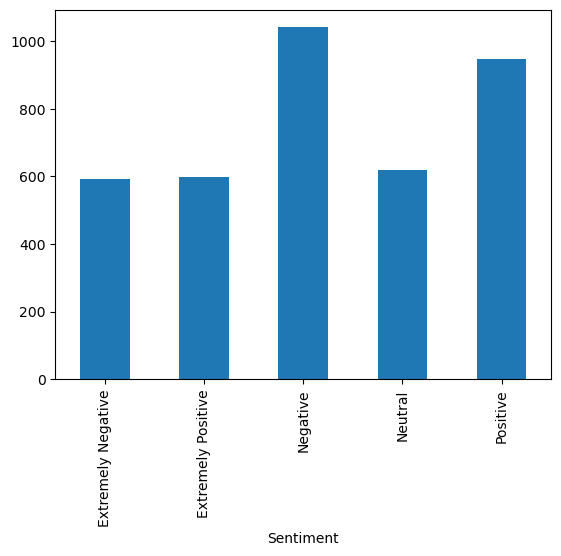

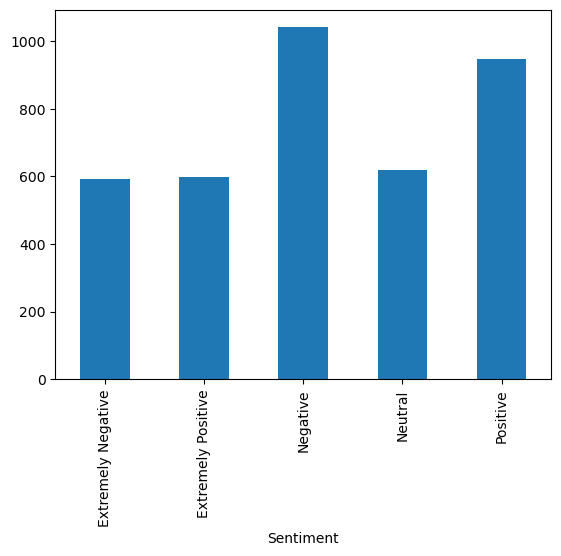

In [28]:
#Analyzing data
df.groupby('Sentiment').Sentiment.count().plot.bar()
plt.show()

In [29]:
# Data Cleaning using regex
regs = re.sub("[^a-zA-Z]", " ", df['OriginalTweet'][0]).lower()
regs

'trending  new yorkers encounter empty supermarket shelves  pictured  wegmans in brooklyn   sold out online grocers  foodkick  maxdelivery  as  coronavirus fearing shoppers stock up https   t co gr  pcrlwh https   t co ivmkmsqdt '

'trending  new yorkers encounter empty supermarket shelves  pictured  wegmans in brooklyn   sold out online grocers  foodkick  maxdelivery  as  coronavirus fearing shoppers stock up https   t co gr  pcrlwh https   t co ivmkmsqdt '

In [10]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Luxmi
[nltk_data]     Acharya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Luxmi
[nltk_data]     Acharya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

'i am love comput'

'i am love comput'

In [31]:
# Data Cleaning removing stopwords
words = stopwords.words("english")
without_stop_words_of_a_news = " ".join([i for i in regs.lower().split() if i not in words])
without_stop_words_of_a_news

'trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold online grocers foodkick maxdelivery coronavirus fearing shoppers stock https co gr pcrlwh https co ivmkmsqdt'

'trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold online grocers foodkick maxdelivery coronavirus fearing shoppers stock https co gr pcrlwh https co ivmkmsqdt'

In [32]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['cleaned'] = list(filter(lambda x: [i for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words],df['OriginalTweet']))
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))
df

C:\Users\Luxmi Acharya\AppData\Local\Temp\ipykernel_8688\779105564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned'] = list(filter(lambda x: [i for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words],df['OriginalTweet']))
C:\Users\Luxmi Acharya\AppData\Local\Temp\ipykernel_8688\779105564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned'] = list(filter(lambda x: [i for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words],df['OriginalTweet']))
C:\Users\Luxmi Achar

,OriginalTweet,Sentiment,cleaned
708,https://t.co/eJwDzqWoq8 3M N95 masks for sale....,Extremely Positive,https://t.co/ejwdzqwoq8 3m n95 mask for sale. ...
2046,PSA: Despite the pandemic declaration &amp; in...,Negative,psa: despit the pandem declar &amp; increas #c...
933,I just returned from the grocery store. Shelv...,Extremely Negative,i just return from the groceri store. shelv ar...
3295,COVID-19 is just feeding my online shopping ad...,Neutral,covid-19 is just feed my onlin shop addict ?
1688,@BBCNWT went shopping this am. Took a trolley ...,Positive,@bbcnwt went shop thi am. took a trolley into ...
...,...,...,...
3679,Yesterday I spoke with the great American Groc...,Extremely Positive,yesterday i spoke with the great american groc...
1575,@ABC7 #abc7eyewitness #Coronavirus \r\r\nWalma...,Extremely Negative,@abc7 #abc7eyewit #coronaviru walmart is have ...
2688,Imagine if we had a president who had a plan f...,Extremely Negative,imagin if we had a presid who had a plan for a...
3269,Liquor store done ? Got there at the 11 am ope...,Neutral,liquor store done ? got there at the 11 am ope...


C:\Users\Luxmi Acharya\AppData\Local\Temp\ipykernel_8688\779105564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))


,OriginalTweet,Sentiment,cleaned
708,https://t.co/eJwDzqWoq8 3M N95 masks for sale....,Extremely Positive,https://t.co/ejwdzqwoq8 3m n95 mask for sale. ...
2046,PSA: Despite the pandemic declaration &amp; in...,Negative,psa: despit the pandem declar &amp; increas #c...
933,I just returned from the grocery store. Shelv...,Extremely Negative,i just return from the groceri store. shelv ar...
3295,COVID-19 is just feeding my online shopping ad...,Neutral,covid-19 is just feed my onlin shop addict ?
1688,@BBCNWT went shopping this am. Took a trolley ...,Positive,@bbcnwt went shop thi am. took a trolley into ...
...,...,...,...
3679,Yesterday I spoke with the great American Groc...,Extremely Positive,yesterday i spoke with the great american groc...
1575,@ABC7 #abc7eyewitness #Coronavirus \r\r\nWalma...,Extremely Negative,@abc7 #abc7eyewit #coronaviru walmart is have ...
2688,Imagine if we had a president who had a plan f...,Extremely Negative,imagin if we had a presid who had a plan for a...
3269,Liquor store done ? Got there at the 11 am ope...,Neutral,liquor store done ? got there at the 11 am ope...


In [33]:
#cleaning dataset
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
words.extend(['a','an','the'])
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x.lower()).split() if i not in words]).lower())
# df['newcleaned'] = [(i for i in list(df['cleaned'])).split() if i not in words ]
df

[nltk_data] Downloading package stopwords to C:\Users\Luxmi
[nltk_data]     Acharya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Luxmi
[nltk_data]     Acharya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Luxmi Acharya\AppData\Local\Temp\ipykernel_8688\6575910.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x.lower()).split() if i not in words]).lower())


,OriginalTweet,Sentiment,cleaned
708,https://t.co/eJwDzqWoq8 3M N95 masks for sale....,Extremely Positive,http co ejwdzqwoq n mask sale mani n varieti u...
2046,PSA: Despite the pandemic declaration &amp; in...,Negative,psa despit pandem declar amp increa covid case...
933,I just returned from the grocery store. Shelv...,Extremely Negative,return groceri store shelv half empti toilet p...
3295,COVID-19 is just feeding my online shopping ad...,Neutral,covid feed onlin shop addict
1688,@BBCNWT went shopping this am. Took a trolley ...,Positive,bbcnwt went shop thi took trolley supermarket ...
...,...,...,...
3679,Yesterday I spoke with the great American Groc...,Extremely Positive,yesterday spoke great american grocer suppli c...
1575,@ABC7 #abc7eyewitness #Coronavirus \r\r\nWalma...,Extremely Negative,abc abc eyewit coronaviru walmart coronaviru i...
2688,Imagine if we had a president who had a plan f...,Extremely Negative,imagin presid plan american stock food orderli...
3269,Liquor store done ? Got there at the 11 am ope...,Neutral,liquor store done got open line wrap around st...


C:\Users\Luxmi Acharya\AppData\Local\Temp\ipykernel_8688\6575910.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x.lower()).split() if i not in words]).lower())


,OriginalTweet,Sentiment,cleaned
708,https://t.co/eJwDzqWoq8 3M N95 masks for sale....,Extremely Positive,http co ejwdzqwoq n mask sale mani n varieti u...
2046,PSA: Despite the pandemic declaration &amp; in...,Negative,psa despit pandem declar amp increa covid case...
933,I just returned from the grocery store. Shelv...,Extremely Negative,return groceri store shelv half empti toilet p...
3295,COVID-19 is just feeding my online shopping ad...,Neutral,covid feed onlin shop addict
1688,@BBCNWT went shopping this am. Took a trolley ...,Positive,bbcnwt went shop thi took trolley supermarket ...
...,...,...,...
3679,Yesterday I spoke with the great American Groc...,Extremely Positive,yesterday spoke great american grocer suppli c...
1575,@ABC7 #abc7eyewitness #Coronavirus \r\r\nWalma...,Extremely Negative,abc abc eyewit coronaviru walmart coronaviru i...
2688,Imagine if we had a president who had a plan f...,Extremely Negative,imagin presid plan american stock food orderli...
3269,Liquor store done ? Got there at the 11 am ope...,Neutral,liquor store done got open line wrap around st...


In [34]:
df.to_csv('cleaned_tweets.csv')

In [41]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer(stop_words="english")
X = df['OriginalTweet']
Y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01) #Splitting dataset

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=100)),
                     ('clf', LogisticRegression(random_state=1))])

# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# pipeline = Pipeline([
#     ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
#     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM
# ])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

In [42]:
print(X_test,y_test)

2702    Im going to start entering the code ÂCOVID-19...
109     Just thinking if we have to close schools, how...
358     Experts saying stock up two weeks worth of foo...
1375    IÂve gotten four notifications from Hopper th...
3129    @Tesco @AsdaServiceTeam @sainsburys @morrisons...
2079    Anyone feel like #Covid_19 is just a massive c...
2375    All prices dropping down except premium and on...
3080     protection regular prices to face masks made in 
2184    Covid-19 fact. You canÂt catch it by shopping...
102     Missouri AG sues televangelist for advertising...
2146    Dirty bird at grocery store just bought last d...
1592    @JohnMagdesian @eugenegu @realDonaldTrump Unle...
3541    @sainsburys have deliveries #Barnstaple just b...
1862    ? Source UCSF/Berkeley Scientists? 40-70% of A...
836     Despite what @DHSgov recommends, there is no r...
1251    More than 250 people stuck in the line up at t...
3186    FRIENDS, PLEASE DON'T PANIC BUY! If everybody ...
1350    Seen a

In [43]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_tweet_sen = model.predict(X_test)
print(accuracy_score(y_test,predict_tweet_sen))
print('\n')
print(predict_tweet_sen)

0.3157894736842105


['Negative' 'Negative' 'Negative' 'Positive' 'Negative' 'Positive'
 'Negative' 'Negative' 'Negative' 'Neutral' 'Positive' 'Negative'
 'Negative' 'Extremely Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Positive' 'Positive' 'Neutral' 'Negative' 'Negative'
 'Positive' 'Negative' 'Negative' 'Positive' 'Negative' 'Negative'
 'Positive' 'Extremely Positive' 'Neutral' 'Negative' 'Positive'
 'Negative' 'Neutral' 'Negative' 'Negative']
0.3157894736842105


['Negative' 'Negative' 'Negative' 'Positive' 'Negative' 'Positive'
 'Negative' 'Negative' 'Negative' 'Neutral' 'Positive' 'Negative'
 'Negative' 'Extremely Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Positive' 'Positive' 'Neutral' 'Negative' 'Negative'
 'Positive' 'Negative' 'Negative' 'Positive' 'Negative' 'Negative'
 'Positive' 'Extremely Positive' 'Neutral' 'Negative' 'Positive'
 'Negative' 'Neutral' 'Negative' 'Negative']


In [45]:
print(X_test,y_test)

2702    Im going to start entering the code ÂCOVID-19...
109     Just thinking if we have to close schools, how...
358     Experts saying stock up two weeks worth of foo...
1375    IÂve gotten four notifications from Hopper th...
3129    @Tesco @AsdaServiceTeam @sainsburys @morrisons...
2079    Anyone feel like #Covid_19 is just a massive c...
2375    All prices dropping down except premium and on...
3080     protection regular prices to face masks made in 
2184    Covid-19 fact. You canÂt catch it by shopping...
102     Missouri AG sues televangelist for advertising...
2146    Dirty bird at grocery store just bought last d...
1592    @JohnMagdesian @eugenegu @realDonaldTrump Unle...
3541    @sainsburys have deliveries #Barnstaple just b...
1862    ? Source UCSF/Berkeley Scientists? 40-70% of A...
836     Despite what @DHSgov recommends, there is no r...
1251    More than 250 people stuck in the line up at t...
3186    FRIENDS, PLEASE DON'T PANIC BUY! If everybody ...
1350    Seen a

In [44]:
file = open('/content/news.txt','r')
news = file.read()
file.close()

# news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)

predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

FileNotFoundError: [Errno 2] No such file or directory: '/content/news.txt'

FileNotFoundError: [Errno 2] No such file or directory: '/content/news.txt'

In [46]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(model.predict(X_test),ytest))
print(confusion_matrix(model.predict(X_test),ytest))

                    precision    recall  f1-score   support

Extremely Negative       0.20      1.00      0.33         1
Extremely Positive       0.25      1.00      0.40         1
          Negative       0.57      0.17      0.27        23
           Neutral       0.25      0.50      0.33         4
          Positive       0.29      0.44      0.35         9

          accuracy                           0.32        38
         macro avg       0.31      0.62      0.34        38
      weighted avg       0.45      0.32      0.30        38

[[1 0 0 0 0]
 [0 1 0 0 0]
 [4 1 4 5 9]
 [0 0 1 2 1]
 [0 2 2 1 4]]
                    precision    recall  f1-score   support

Extremely Negative       0.20      1.00      0.33         1
Extremely Positive       0.25      1.00      0.40         1
          Negative       0.57      0.17      0.27        23
           Neutral       0.25      0.50      0.33         4
          Positive       0.29      0.44      0.35         9

          accuracy           

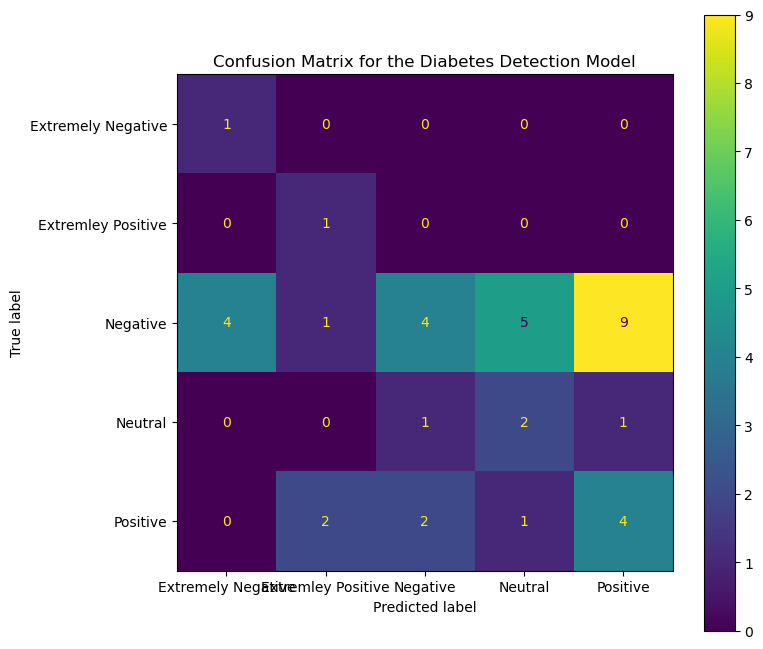

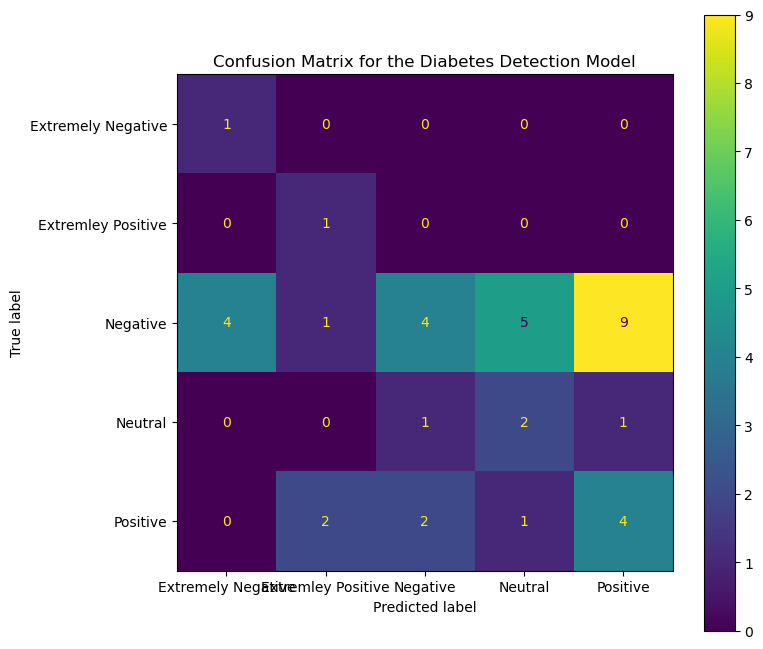

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['Extremely Negative','Extremley Positive','Negative','Neutral','Positive']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);